In [40]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns',None)

In [41]:
data = pd.read_csv(r'C:/Users/Administrator/Datas/门店数据/曝光-1-5相关性/1-1.csv',encoding='gbk')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   开始日期             372 non-null    int64  
 1   结束日期             372 non-null    int64  
 2   商家ID             372 non-null    int64  
 3   商家名称             372 non-null    object 
 4   运营组              372 non-null    object 
 5   省份               372 non-null    object 
 6   城市               372 non-null    object 
 7   是否新增商家           372 non-null    object 
 8   首次上线日期           372 non-null    int64  
 9   门店在线状态           372 non-null    object 
 10  （日均）预设营业时长（h）    372 non-null    float64
 11  （日均）在线营业时长（h）    372 non-null    float64
 12  曝光人数             372 non-null    int64  
 13  入店人数             372 non-null    int64  
 14  下单人数             372 non-null    int64  
 15  下单新客人数           372 non-null    int64  
 16  入店转化率            372 non-null    float64
 17  下单转化率           

In [42]:
data_manjian = data[['开始日期','商家ID','原价交易额','实付交易额','有效订单数','商家补贴金额']]

In [43]:
data_manjian['平均原价'] = data_manjian['原价交易额']/data_manjian['有效订单数']

e:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
data_manjian['平均实付'] = data_manjian['实付交易额']/data_manjian['有效订单数']

e:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
data_manjian

,开始日期,商家ID,原价交易额,实付交易额,有效订单数,商家补贴金额,平均原价,平均实付
0,20200101,295680,578.00,203.00,3,492.00,192.666667,67.666667
1,20200101,642989,0.00,0.00,0,0.00,NaN,NaN
2,20200101,653643,553.00,347.00,2,284.00,276.500000,173.500000
3,20200101,714142,5441.00,1373.09,9,4371.91,604.555556,152.565556
4,20200101,720330,0.00,0.00,0,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...
367,20200101,8471409,0.00,0.00,0,0.00,NaN,NaN
368,20200101,8471425,0.00,0.00,0,0.00,NaN,NaN
369,20200101,8471437,0.02,0.01,1,0.01,0.020000,0.010000
370,20200101,8472854,245.00,120.00,1,159.00,245.000000,120.000000


In [46]:
data_manjian['转化率'] = data_manjian['平均实付']/data_manjian['平均原价']

e:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
data_manjian = data_manjian.fillna(0)

In [48]:




data_manjian

,开始日期,商家ID,原价交易额,实付交易额,有效订单数,商家补贴金额,平均原价,平均实付,转化率
0,20200101,295680,578.00,203.00,3,492.00,192.666667,67.666667,0.351211
1,20200101,642989,0.00,0.00,0,0.00,0.000000,0.000000,0.000000
2,20200101,653643,553.00,347.00,2,284.00,276.500000,173.500000,0.627486
3,20200101,714142,5441.00,1373.09,9,4371.91,604.555556,152.565556,0.252360
4,20200101,720330,0.00,0.00,0,0.00,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
367,20200101,8471409,0.00,0.00,0,0.00,0.000000,0.000000,0.000000
368,20200101,8471425,0.00,0.00,0,0.00,0.000000,0.000000,0.000000
369,20200101,8471437,0.02,0.01,1,0.01,0.020000,0.010000,0.500000
370,20200101,8472854,245.00,120.00,1,159.00,245.000000,120.000000,0.489796


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 36716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 36716 missing from current font.
  font.set_text(s, 0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0, flags=flags)
e:\python\lib\site-packages\matplotlib\backend

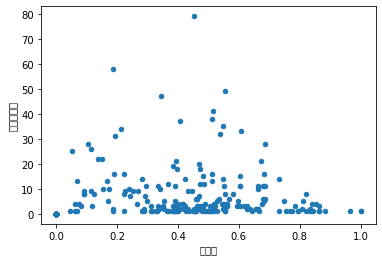

In [50]:
data_manjian.plot.scatter(x='转化率', y='有效订单数')

e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 23454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20184 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20132 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 39069 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 23454 missing from current font.
  font.set_text(s, 0, flags=flags)
e:\python\lib\site-packages\matplotlib\bac

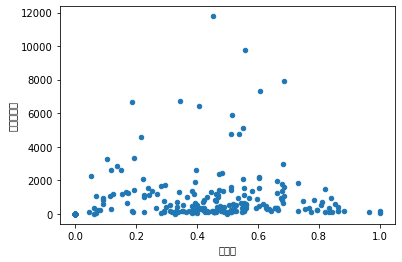

In [51]:
data_manjian.plot.scatter(x='转化率', y='实付交易额')

e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 22343 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 24179 missing from current font.
  font.set_text(s, 0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 22343 missing from current font.
  font.set_text(s, 0, flags=flags)


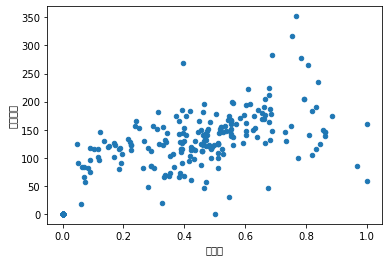

In [52]:
data_manjian.plot.scatter(x='转化率', y='平均实付')

In [71]:
from pyecharts import Bar3D
data_3d = data_manjian[['实付交易额','原价交易额','有效订单数']]
%matplotlib inline



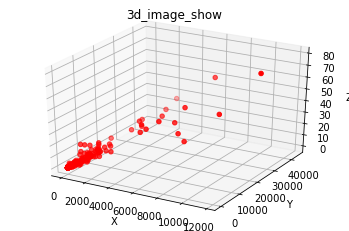

In [72]:

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d

x = data_3d['实付交易额']
y = data_3d['原价交易额']
z = data_3d['有效订单数']

ax = plt.subplot(projection = '3d')  # 创建一个三维的绘图工程
ax.set_title('3d_image_show')  # 设置本图名称
ax.scatter(x, y, z, c = 'r')   # 绘制数据点 c: 'r'红色，'y'黄色，等颜色

ax.set_xlabel('X')  # 设置x坐标轴
ax.set_ylabel('Y')  # 设置y坐标轴
ax.set_zlabel('Z')  # 设置z坐标轴

plt.show()

In [36]:
# import matplotlib.pyplot as plt
# from mpl_toolkits import mplot3d
# %matplotlib notebook
# %matplotlib inline

# x = [ ]
# y = [ ]
# z = [ ]

# for i in iter(data_3d)
#     x.append(i)
#     y.append(i)
#     z.append(i)
    
# ax = plt.axes(projection='3d')
# ax.scatter3D(x, y, z, c=z, cmap='Greens')

In [22]:
data_manjian_helf = data_manjian[data_manjian['转化率']<= 0.4]
data_manjian_helf = data_manjian_helf.sort_values('转化率',ascending = False)
data_manjian_helf

,开始日期,商家ID,原价交易额,实付交易额,有效订单数,商家补贴金额,平均原价,平均实付,转化率
180,20200101,7311299,170.0,68.00,1,141.00,170.000000,68.000000,0.400000
240,20200101,7545492,768.0,307.00,2,539.00,384.000000,153.500000,0.399740
337,20200101,8278460,6562.0,2604.09,18,4718.91,364.555556,144.671667,0.396844
54,20200101,4473272,680.0,269.00,1,450.00,680.000000,269.000000,0.395588
136,20200101,6967767,4836.0,1905.50,21,3702.00,230.285714,90.738095,0.394024
...,...,...,...,...,...,...,...,...,...
149,20200101,7028637,0.0,0.00,0,0.00,0.000000,0.000000,0.000000
150,20200101,7063793,0.0,0.00,0,0.00,0.000000,0.000000,0.000000
156,20200101,7166112,0.0,0.00,0,0.00,0.000000,0.000000,0.000000
157,20200101,7166113,0.0,0.00,0,0.00,0.000000,0.000000,0.000000


In [23]:
data_manjian_helf_drop =data_manjian_helf.drop(data_manjian_helf[data_manjian_helf.原价交易额 < 1].index)

In [114]:
data_manjian_helf_drop = data_manjian_helf_drop.sort_values('有效订单数',ascending = False)

In [115]:
data_manjian_helf_drop

,开始日期,商家ID,原价交易额,实付交易额,有效订单数,商家补贴金额,平均原价,平均实付,转化率
660,20200401,7207851,27231.0,10420.50,124,21349.00,219.604839,84.036290,0.382670
562,20200101,7207851,36050.0,6684.71,58,30993.19,621.551724,115.253621,0.185429
1843,20200501,8986583,15660.0,6106.00,50,11484.00,313.200000,122.120000,0.389911
1188,20200501,9022889,16775.0,6603.00,50,12095.00,335.500000,132.060000,0.393621
95,20200101,6774016,19530.0,6732.07,47,14310.73,415.531915,143.235532,0.344704
...,...,...,...,...,...,...,...,...,...
428,20200401,8755681,745.0,298.00,1,447.00,745.000000,298.000000,0.400000
916,20200401,7264474,268.0,96.00,1,211.00,268.000000,96.000000,0.358209
1459,20200401,6944778,208.0,75.00,1,172.00,208.000000,75.000000,0.360577
515,20200401,7514886,208.0,75.00,1,172.00,208.000000,75.000000,0.360577


In [110]:
# 分别分为转换率小于0.5的    然后删除没意义也就是空值
# 最后用订单进行一个排序    
# data_manjian_helf_drop是一个转化率低于0.5    删除没意义数值 订单从大到小
# 863


# data_manjian是全部的数值
# 2098